In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
import json
import csv

import folium
from folium.features import GeoJson, GeoJsonTooltip, GeoJsonPopup

import geopandas as gpd
from functools import partial

In [19]:
# 1 Antalja mapa

# Координаты центра Анталья
antalja_coords = [36.8841, 30.7056] #[52.5200, 13.4050]

#import folium
#m = folium.Map(location=[latitude, longitude], zoom_start=10)
#folium.Marker([lat, lon], popup='Marker Name').add_to(m)
#m.save('map.html')

antalja_map = folium.Map(location=antalja_coords,
                        #width=600,
                        #height=500,
                        tiles='OpenStreetMap',
                        #tiles='white_tile',
                        scrollWheelZoom=False,
                        maxBounds=[[53, 54],[12, 13]],
                        # min_lat=50,
                        # max_lat=55,
                        # min_lon=12,
                        # max_lon=13,
                        crs='EPSG3857',
                        control_scale=True,                        
                        zoom_control=True,
                        dragging=True,
                        min_zoom=10,
                        max_zoom=25,
                        zoom_start=12)

# folium.GeoJson(data,
#                 #style_function=style_function
#                 style_function = partial(
#                         style_function, 
#                         colors_by_part.get(element, #colors_by_part[element], 
#                         'grey')) # element
#                 ).add_to(berlin_map)


# location=None, popup=None, tooltip=None, icon=None, draggable=False, **kwargs)
folium.Marker(location=antalja_coords,
              popup='Antalja',
              draggable=False,
              ).add_to(antalja_map)

antalja_map

In [20]:
# 2 Data from today's monitoring stations:
# https://aqicn.org/data-platform/

dfa = pd.read_csv('data_Antalja.csv') 
dfa.head()
today = datetime.date.today()
dfa_today = dfa[dfa['date']== str(today)]
print(f'active {len(dfa_today)} counters:')
dfa_today 

active 3 counters:


,date,station_id,satation_name,lat,long,pm25,pm10,o3,no2,co
56,2024-08-21,4045,"Antalya, Turkey",36.914883,30.700425,59.0,33.0,15.0,NaN,NaN
57,2024-08-21,13915,"Trafik, Turkey",36.888724,30.683573,61.0,36.0,16.0,NaN,NaN
58,2024-08-21,14801,"Muratpaşa, Turkey",36.892355,30.733423,59.0,33.0,15.0,NaN,NaN


In [21]:
for x in dfa_today.index: #df_today['station_id']:
    print( dfa_today['station_id'][x], end=',') 

4045,13915,14801,

In [22]:
# 3 Air Pollution pm25 - анализ показателей pm25
# 4045, 13915, 14801

# data
# dfa_today.index #['station_id']
# print(df_today.index, end='' )

dfa_today['station_id']

print(f'counters: ')
for x in dfa_today.index: #dfa_today['station_id']:
    print( dfa_today['station_id'][x], end=',')     
print()   

values = dfa_today['pm25']
mmin = min(values)
mmax = max(values)
delta= (mmax - mmin) 
print(f'{mmax=} {mmin=} {delta=} ')    

for x in dfa_today.index:      
    #print( x, [dfa_today['lat'][x], dfa_today['long'][x] ])

    if  mmin <= int( dfa_today['pm25'][x] ) <= mmin+delta/2:
        #c = 'g'#'#DA70D6'
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='green' ,  # Цвет круга
                         fill=True,
                         fill_color='green' 
                         ).add_to(antalja_map)
    elif  mmin+delta/2 < int( dfa_today['pm25'][x] ) <= mmax:
        c = 'r'# '#8A2BE2'
        
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='red' ,  # Цвет круга
                         fill=True,
                         fill_color='red'
                         ).add_to(antalja_map)


print(today)
print(f'Air Pollution pm10: {mmin=} {mmax=} {delta=}')     

antalja_map

counters: 
4045,13915,14801,
mmax=61.0 mmin=59.0 delta=2.0 
2024-08-21
Air Pollution pm10: mmin=59.0 mmax=61.0 delta=2.0


In [23]:
# 4 Air Pollution pm10 - анализ показателей pm10
# 4045, 13915, 14801

# data
# dfa_today.index #['station_id']
# print(df_today.index, end='' )

dfa_today['station_id']

print(f'counters: ')
for x in dfa_today.index: #dfa_today['station_id']:
    print( dfa_today['station_id'][x], end=',')     
print()   

values = dfa_today['pm10']
mmin = min(values)
mmax = max(values)
delta= (mmax - mmin) 
print(f'{mmax=} {mmin=} {delta=} ')    

for x in dfa_today.index:      
    #print( x, [dfa_today['lat'][x], dfa_today['long'][x] ])

    if  mmin <= int( dfa_today['pm10'][x] ) <= mmin+delta/2:
        #c = 'g'#'#DA70D6'
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='green' ,  # Цвет круга
                         fill=True,
                         fill_color='green' 
                         ).add_to(antalja_map)
    elif  mmin+delta/2 < int( dfa_today['pm10'][x] ) <= mmax:
        c = 'r'# '#8A2BE2'
        
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='red' ,  # Цвет круга
                         fill=True,
                         fill_color='red'
                         ).add_to(antalja_map)


print(today)
print(f'Air Pollution pm10: {mmin=} {mmax=} {delta=}')     

antalja_map

counters: 
4045,13915,14801,
mmax=36.0 mmin=33.0 delta=3.0 
2024-08-21
Air Pollution pm10: mmin=33.0 mmax=36.0 delta=3.0


In [24]:
# 5 Air Pollution o3 - анализ показателей о3
# 4045, 13915, 14801

# data
# dfa_today.index #['station_id']
# print(df_today.index, end='' )

dfa_today['station_id']

print(f'counters: ')
for x in dfa_today.index: #dfa_today['station_id']:
    print( dfa_today['station_id'][x], end=',')     
print()   

values = dfa_today['o3']
mmin = min(values)
mmax = max(values)
delta= (mmax - mmin) 
print(f'{mmax=} {mmin=} {delta=} ')    

for x in dfa_today.index:      
    #print( x, [dfa_today['lat'][x], dfa_today['long'][x] ])

    if  mmin <= int( dfa_today['o3'][x] ) <= mmin+delta/2:
        #c = 'g'#'#DA70D6'
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='green' ,  # Цвет круга
                         fill=True,
                         fill_color='green' 
                         ).add_to(antalja_map)
    elif  mmin+delta/2 < int( dfa_today['o3'][x] ) <= mmax:
        c = 'r'# '#8A2BE2'
        
        folium.CircleMarker( location=[dfa_today['lat'][x], dfa_today['long'][x] ], #[berlin_Stadtteil_coords[bezirk]],
                         radius=6,  # Радиус круга в пикселях
                         popup=str(x),
                         color='red' ,  # Цвет круга
                         fill=True,
                         fill_color='red'
                         ).add_to(antalja_map)


print(today)
print(f'Air Pollution o3: {mmin=} {mmax=} {delta=}')     

antalja_map

counters: 
4045,13915,14801,
mmax=16.0 mmin=15.0 delta=1.0 
2024-08-21
Air Pollution o3: mmin=15.0 mmax=16.0 delta=1.0


 Correlation matrix


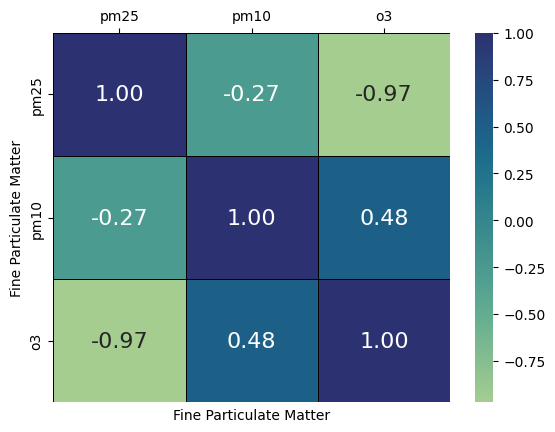

In [25]:
# 6 statistic  - correlation matrix
dffa = dfa[['pm25', 'pm10', 'o3']]
dffa.head()
ar_corr = dffa.corr()
ar_corr

import seaborn as sns
figsize = (8,6)
ax = sns.heatmap(ar_corr, 
            annot=True,
            annot_kws={"size": 16},
            fmt=".2f",
            linewidth=.5, 
            cbar=True, 
            linecolor='black', 
            robust=True, 
            xticklabels=True,
            cmap="crest"  )
print(' Correlation matrix' )
ax.set(xlabel="Fine Particulate Matter", ylabel="Fine Particulate Matter")
ax.xaxis.tick_top()

Air Pollution - description


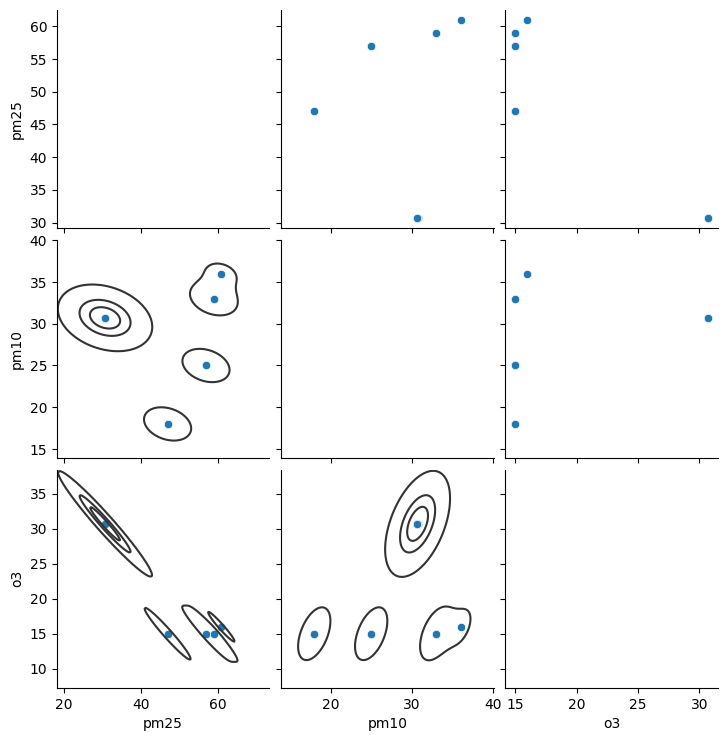

In [32]:
# 7 Air Pollution - description
figsize = (6,6)
print('Air Pollution - description')
g = sns.pairplot(dffa, diag_kind="reg", diag_kws = {'color': '#FF5050'},)
g.map_lower(sns.kdeplot, levels=4, color=".2")

Air Pollution - Regression


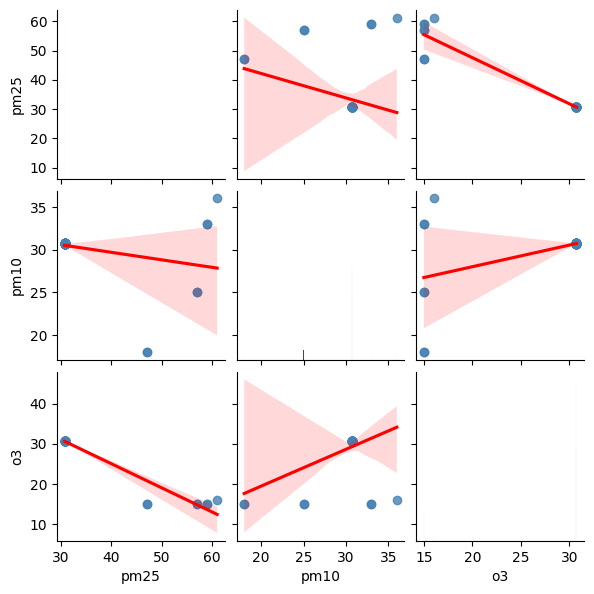

In [31]:
# 8 Air Pollution - pollution description
#import matplotlib.pyplot as plt
print('Air Pollution - Regression')
pairplot = sns.pairplot(dffa, 
                        kind='reg', 
                        plot_kws={'color': 'steelblue', 'line_kws':{'color':'red'}},
                        diag_kws = {'color': 'navy'},
                        corner = False,
                        height=2  )
#plt.title('Regression')
plt.show()